In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

2022-01-24 20:33:21.213731: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-24 20:33:21.213830: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [5]:
# make suare images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape: ", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
# Build the model
model = keras.Sequential(
[
    keras.Input(shape=input_shape),
    tf.keras.layers.Flatten(),
    layers.Dense(num_classes, activation="softmax"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


2022-01-24 20:33:42.745516: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-24 20:33:42.745580: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-24 20:33:42.745626: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2022-01-24 20:33:42.746139: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
batch_size = 128
epochs = 30

model.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

2022-01-24 20:33:44.235840: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 169344000 exceeds 10% of free system memory.


Epoch 1/30
420/422 [============================>.] - ETA: 0s - loss: 0.7254 - accuracy: 0.8182

2022-01-24 20:33:49.466580: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18816000 exceeds 10% of free system memory.


422/422 [==============================] - 6s 11ms/step - loss: 0.7239 - accuracy: 0.8186 - val_loss: 0.3576 - val_accuracy: 0.9107
Epoch 2/30
422/422 [==============================] - 3s 8ms/step - loss: 0.3803 - accuracy: 0.8981 - val_loss: 0.2870 - val_accuracy: 0.9252
Epoch 3/30
422/422 [==============================] - 3s 8ms/step - loss: 0.3329 - accuracy: 0.9084 - val_loss: 0.2622 - val_accuracy: 0.9295
Epoch 4/30
422/422 [==============================] - 3s 8ms/step - loss: 0.3109 - accuracy: 0.9140 - val_loss: 0.2496 - val_accuracy: 0.9320
Epoch 5/30
422/422 [==============================] - 3s 7ms/step - loss: 0.2976 - accuracy: 0.9169 - val_loss: 0.2433 - val_accuracy: 0.9355
Epoch 6/30
422/422 [==============================] - 3s 7ms/step - loss: 0.2886 - accuracy: 0.9191 - val_loss: 0.2379 - val_accuracy: 0.9378
Epoch 7/30
422/422 [==============================] - 4s 8ms/step - loss: 0.2822 - accuracy: 0.9210 - val_loss: 0.2339 - val_accuracy: 0.9363
Epoch 8/30
422/4

In [9]:
# Evaluate the trained model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

2022-01-24 20:36:07.680585: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


Test loss:  0.2657037377357483
Test accuracy:  0.9265000224113464


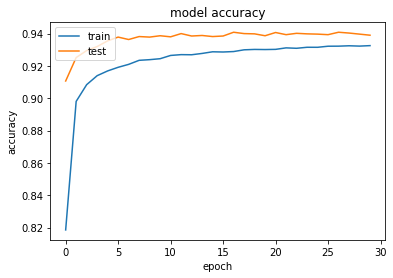

In [12]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

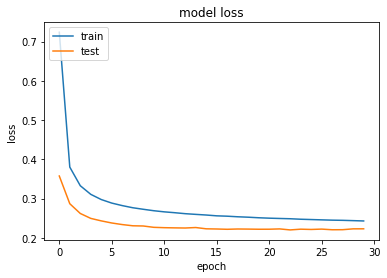

In [13]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
a_val_img = x_test[0]

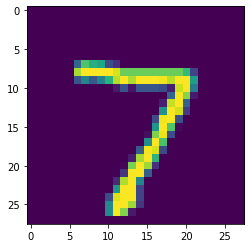

In [15]:
plt.imshow(a_val_img)

In [16]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [17]:
np.shape(a_val_img)

(28, 28, 1)

In [18]:
model.predict(np.array([a_val_img]))

array([[4.7791730e-07, 6.0623951e-13, 1.5589544e-06, 5.8967313e-03,
        2.7074552e-07, 2.0959236e-05, 1.6274119e-11, 9.9368852e-01,
        1.2116020e-05, 3.7941473e-04]], dtype=float32)

In [19]:
# save the model to file
model.save('./Data/dense_softmax_model.h5')